In [9]:
import numpy as np
import math

# a)
def divdiff_add_node(X, Y, n, x, y):
    X[n] = x
    Y[n][0] = y
    for i in range (1, n + 1):
        Y[n - i][i] = (Y[n - i + 1][i - 1] - Y[n - i][i - 1]) / (x - X[n - i])
    return n + 1


2
[ 0.  -0.5  0.   0.   0. ]
[[ 0. -2.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


# Korrektur



c) nicht -1

d) Etwas mehr Interpretation der Ergebnisse fehlt, also was ist besser, äquidistante Stützstellen oder tschebitschew?
-0

f) habt ihr die Klasse getestet?

13p

In [2]:
# b)
def horner_newton(xi, X, Y, n):
    yi = np.array([])
    for x in xi:
        p = 0
        for i in range(len(X)):
            newton = 1
            for j in range(i):
                newton *= x - X[j]
            p += Y[0][i] * newton
        yi = np.append(yi, [p])
    return yi 

In [3]:
        
# c)
a = -1.0
b = 1.0
grad = 4
X = np.array(np.linspace(a, b, grad + 1))
# for i in range (0, grad + 1):
    

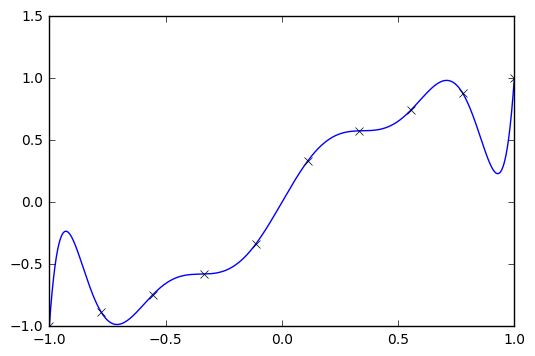

Absolute Fehler:  139.4951435786324


In [10]:
# d)
import matplotlib.pyplot as plt

def g(x):
    res = np.array([np.sign(i) * math.sqrt(math.fabs(i)) for i in x])
    return res

def punkt(n):
    xi = np.array([])
    for i in range(0, n + 1):
        xi = np.append(xi, [math.cos((2 * i + 1) * math.pi / (2 * ( n + 1)))])
    return xi

a = -1.0
b = 1.0

# äqidistante Stützstelle
ni = 10
xi = np.linspace(a, b, ni)
yi = g(xi)
X = np.zeros(ni + 1)
Y = np.zeros((ni + 1, ni + 1))
X[0] = xi[0]
Y[0][0] = yi[0]
for i in range(1, len(xi)):
    divdiff_add_node(X, Y, i, xi[i], yi[i])
t = np.linspace(a, b, 1000)
p = horner_newton(t, X, Y, ni)
plt.plot(t, p)
plt.plot(xi, yi, 'kx')
plt.show()

# Fehler
f = 0
for i in range(len(t)):
    f += math.fabs(g([t[i]])[0] - p[i])
print("Absolute Fehler: ", f)

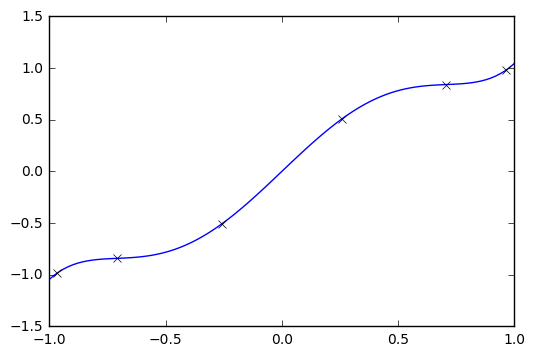

Absolute Fehler:  5.047532367608318


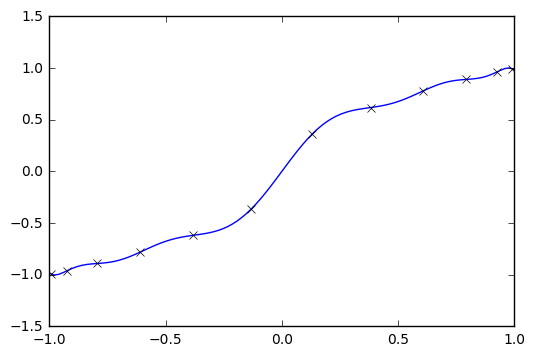

Absolute Fehler:  2.466325444291776


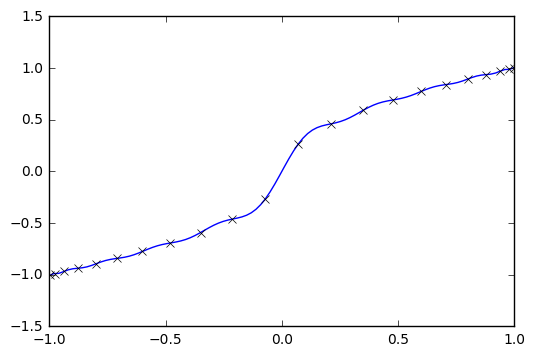

Absolute Fehler:  1.2286867642850816


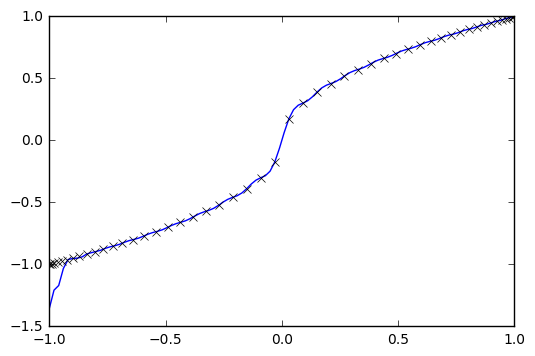

Absolute Fehler:  1.268704166782178


In [5]:
# Tchebytschow-Punkte
for ni in [5, 11, 21, 51]:
    xi = punkt(ni)
    yi = g(xi)
    X = np.zeros(ni + 1)
    Y = np.zeros((ni + 1, ni + 1))
    X[0] = xi[0]
    Y[0][0] = yi[0]
    for i in range(1, len(xi)):
        divdiff_add_node(X, Y, i, xi[i], yi[i])
    t = np.linspace(a, b, 100)
    p = horner_newton(t, X, Y, ni)
    plt.plot(t, p)
    plt.plot(xi, yi, 'kx')
    plt.show()
    # Fehler
    f = 0
    for i in range(len(t)):
        f += math.fabs(g([t[i]])[0] - p[i])
    print("Absolute Fehler: ", f)
    

In [11]:
# f)
class interpolation():
    X = np.array([])
    Y = np.array([])
    n = 0
    def _init_ (self, X, Y, n):
        self.X = X
        self.Y = Y
        self.n = n
    def divdiff_add_node(self, x, y):
        self.X.append([x])
        self.Y.append([y])
        n = self.n
        for i in range (0, n + 1):
            Y[n - i][i + 1] = Y[n - i + 1][i] - Y[n - i][i] / (x - X[n - i])
        return n + 1